In [1]:
#Install the dependencies
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
from sklearn.metrics import accuracy_score
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing datasets  
dfx= pd.read_csv('Downloads/stocknet_trn_data (1).csv')  
dfx

,Open,High,Low,Volume
0,75.430000,75.910004,75.139999,3436700.0
1,124.930000,124.940002,124.169998,2366700.0
2,84.339996,84.370003,82.370003,11338700.0
3,56.770000,57.150002,56.529999,413300.0
4,47.419998,48.090000,46.759998,9531100.0
...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0
97728,64.419998,64.730003,64.190002,20273100.0
97729,581.070007,581.400024,571.070007,3416500.0
97730,120.650002,120.650002,114.959999,13261700.0


In [3]:
dfy=pd.read_csv('Downloads/stocknet_trn_data_targets (1).csv',header=None)
dfy = dfy.rename(columns ={1:"Close"}) # renaming column 1 as 'Close'

dfy

,0,Close
0,d1,75.650002
1,d2,124.449997
2,d3,82.660004
3,d4,57.009998
4,d5,47.860001
...,...,...
97727,d97728,103.230003
97728,d97729,64.620003
97729,d97730,575.140015
97730,d97731,115.400002


In [4]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97732 entries, 0 to 97731
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    97729 non-null  float64
 1   High    97729 non-null  float64
 2   Low     97729 non-null  float64
 3   Volume  97729 non-null  float64
dtypes: float64(4)
memory usage: 3.0 MB


In [5]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97732 entries, 0 to 97731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       97732 non-null  object 
 1   Close   97729 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [6]:
#Replacing null values with respective mean of their columns

# df1=dfx
# df2=dfy

# df1['Open'].fillna(int(df1['Open'].mean()), inplace = True)
# df1['High'].fillna(int(df1['High'].mean()), inplace = True)
# df1['Low'].fillna(int(df1['Low'].mean()), inplace = True)
# df1['Volume'].fillna(int(df1['Volume'].mean()), inplace = True)

# df2['Close'].fillna(int(df2['Close'].mean()), inplace = True

### we are getting more efficient results by removing the null values rather than replacing them with mean.

In [7]:
dfx=dfx.dropna()

In [8]:
dfy=dfy.dropna()

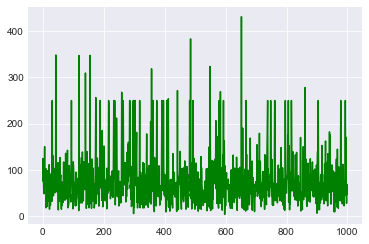

In [9]:
# Extract only top 60 rows to make the plot a little clearer
new_dfy = dfy.head(1000)
new_new = pd.DataFrame()
new_new['Close'] = [new_dfy['Close'][i] if new_dfy['Close'][i] <=500 else 250 for i in range(len(new_dfy))]
#  Plotting the close  market stock price
new_new['Close'].plot(kind = 'line',color="green")
 
plt.show()

### Linear Regression

In [10]:
# Split the data into train and test with 70 & 30 % respectively
X_train, X_test, y_train, y_test = train_test_split(dfx,dfy['Close'],test_size=0.3,random_state = 0)

In [11]:
# Fitting the model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [12]:
#Return the coefficient of determination of the prediction.
LR.score(X_test,y_test,sample_weight=None)

0.9999902566632185

In [13]:
parameters=LR.get_params(deep=True) # Get parameters for this estimator.
parameters

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [14]:
pred=LR.predict(X_test) #Predict using the linear model.
pred

array([ 51.28607304, 133.91661024,  54.43706548, ...,  68.8344836 ,
       146.84901847, 101.75097018])

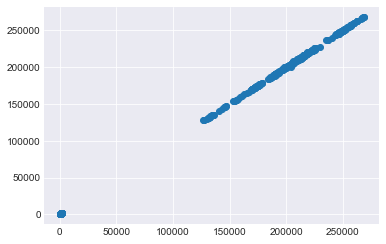

In [15]:
#checking predicted y and labeled y using a scatter plot.
plt.scatter(y_test,pred)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math as math
print('Model Coefficients:', LR.coef_)
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, pred)))
print('R_squared Value:', r2_score(y_test, pred))

Model Coefficients: [-5.70049320e-01  8.09631058e-01  7.60573883e-01  2.57749043e-10]
Mean Squared Error: 4597.640621501371
Mean Absolute Error: 5.681927784516371
Root Mean Squared Error: 67.80590403129635
R_squared Value: 0.9999902566632185


In [17]:
import pandas as pd
Final = pd.read_csv("Downloads/stocknet_tst_data.csv") 
Final

,Open,High,Low,Volume
0,26.299999,26.520000,25.959999,32642100
1,95.550003,95.739998,94.019997,1826300
2,54.770000,55.360001,54.590000,5656800
3,125.589996,125.820000,123.660004,4151600
4,20.709999,20.809999,20.670000,10489800
...,...,...,...,...
10855,51.660000,52.919998,49.919998,87000
10856,39.549999,40.619999,39.189999,35177200
10857,22.780001,22.900000,22.389999,9404100
10858,33.750000,34.060001,33.580002,26179000


In [18]:
predictions = LR.predict(Final)
predictions

array([26.2082638 , 94.53172052, 55.0969952 , ..., 22.5627335 ,
       33.85992419, 90.75305767])

In [19]:
np.savetxt("project_predicted_labels_19274.txt",predictions , delimiter="\n", fmt="%.6f")

### Decision Tree Regressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 1)
dtr.fit(X_train,y_train)
print(dtr.score(X_test,y_test))

0.9999694191374413


In [21]:
# Decision Tree Model Evaluation

In [22]:
prediction=dtr.predict(X_test)

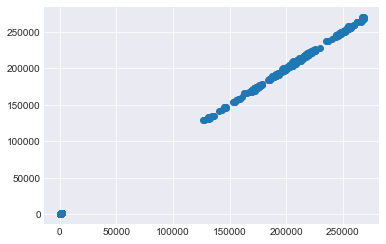

In [23]:
#checking predicted y and labeled y using a scatter plot.
plt.scatter(y_test,prediction)

In [24]:
#Hyper Parameter tuning
parameters={"splitter":["best","random"],
            "max_depth" : [1,5],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt"], #auto and None work the same
           "max_leaf_nodes":[None,10,20,30,40] }

In [25]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dtr,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)

print(tuning_model.best_params_)
print(tuning_model.best_estimator_.score(X_test,y_test))

{'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'splitter': 'best'}
0.999860817275625


In [26]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

pred=dtr.predict(X_test) #make prediction on test set 
rmse = math.sqrt(mean_squared_error(y_test,pred))
mae = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test,pred)

# rmse_val.append(rmse) #store rmse values 
print ('RMSE value for k=','is:' ,rmse) 
print('Mean absolute error:', mae) 
print('R2 score:', r2)

RMSE value for k= is: 120.12641570107218
Mean absolute error: 10.23094469784099
R2 score: 0.9999694191374413


In [27]:
import pandas as pd
dtr_Final = pd.read_csv("Downloads/stocknet_tst_data.csv") 
dtr_Final

,Open,High,Low,Volume
0,26.299999,26.520000,25.959999,32642100
1,95.550003,95.739998,94.019997,1826300
2,54.770000,55.360001,54.590000,5656800
3,125.589996,125.820000,123.660004,4151600
4,20.709999,20.809999,20.670000,10489800
...,...,...,...,...
10855,51.660000,52.919998,49.919998,87000
10856,39.549999,40.619999,39.189999,35177200
10857,22.780001,22.900000,22.389999,9404100
10858,33.750000,34.060001,33.580002,26179000


In [28]:
predictions_dtr = tuning_model.predict(dtr_Final)
predictions_dtr

array([ 21.07854944, 109.45644354,  61.43180596, ...,  21.07854944,
        42.26887446,  80.70821937])

In [29]:
np.savetxt("project_predicted_labels_dtr.txt",predictions_dtr, delimiter="\n", fmt="%.6f")

### Support Vector Regressor(SVR)

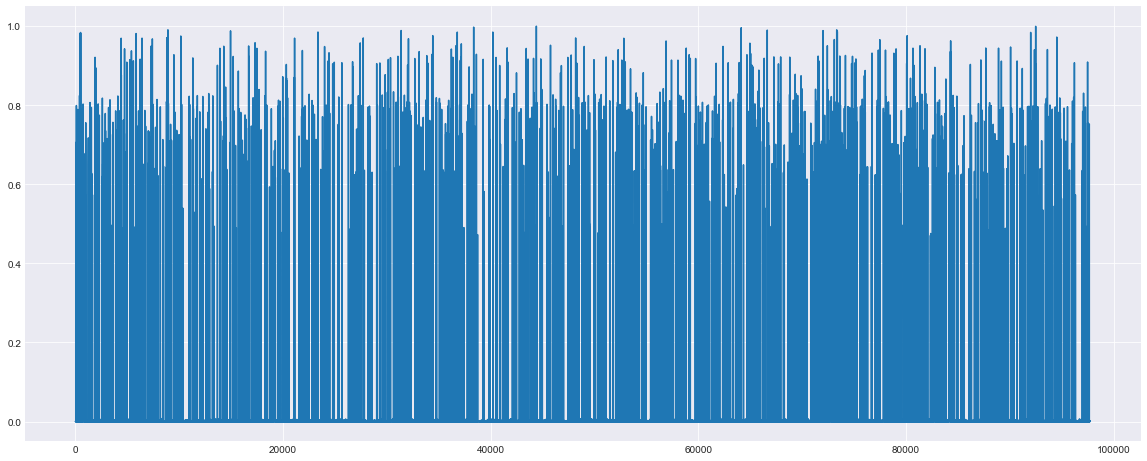

In [30]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaled = MinMaxScaler().fit_transform(dfx)
dfx = pd.DataFrame(scaled,columns = dfx.columns)

scaled = MinMaxScaler().fit_transform(dfy['Close'].values.reshape(-1,1))
dfy = pd.DataFrame(scaled,columns = ['Close'])
ax = plt.figure(figsize=(20,8))
plt.plot(dfy)
plt.show()

In [31]:
# Split the data into train and test with 80 & 20 % respectively
X_train, X_test, y_train, y_test = train_test_split(dfx,dfy['Close'],test_size=0.2)

In [32]:

from sklearn.svm import SVR
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Train the model 
svr.fit(X_train, y_train)


SVR(C=1000.0, gamma=0.1)

In [33]:
prediction = svr.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
# The best possible score is 1.0
# svm_confidence = svr.score(y_test,prediction)
svr_mse = mean_squared_error(y_test,prediction)
svr_mae = mean_absolute_error(y_test,prediction)
# print("svm confidence:", svm_confidence)
print('MSE',svr_mse)
print('MAE', svr_mae)


MSE 0.00975696521831617
MAE 0.09853812451153661


In [36]:
import pandas as pd
svr_Final = pd.read_csv("Downloads/stocknet_tst_data.csv") 
svr_Final

,Open,High,Low,Volume
0,26.299999,26.520000,25.959999,32642100
1,95.550003,95.739998,94.019997,1826300
2,54.770000,55.360001,54.590000,5656800
3,125.589996,125.820000,123.660004,4151600
4,20.709999,20.809999,20.670000,10489800
...,...,...,...,...
10855,51.660000,52.919998,49.919998,87000
10856,39.549999,40.619999,39.189999,35177200
10857,22.780001,22.900000,22.389999,9404100
10858,33.750000,34.060001,33.580002,26179000


In [37]:
predictions = svr.predict(svr_Final)

In [38]:
np.savetxt("project_predicted_labels_svr.txt",prediction, delimiter="\n", fmt="%.6f")

### We got better results for Linear Regression Compared to other models.Hence we are submitting them as final result.